In [1]:
%reload_ext autoreload
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns


import math

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import statsmodels.api as sm

In [3]:
import multiprocessing

In [4]:
from __future__ import division

p = 20

w = np.ones((p,)) / math.sqrt(p)

In [5]:
n = 100

X = np.random.multivariate_normal(np.zeros((p,)), np.eye(p), n)

err_scale = 10

Y = X.dot(w) + np.random.normal(0, scale=err_scale, size=n)


In [6]:
sm_lr = sm.OLS(Y, X)
sm_lr_fit = sm_lr.fit()

In [7]:
print sm_lr_fit.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     2.044
Date:                Tue, 04 Apr 2017   Prob (F-statistic):             0.0133
Time:                        16:32:19   Log-Likelihood:                -345.19
No. Observations:                 100   AIC:                             730.4
Df Residuals:                      80   BIC:                             782.5
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.5933      0.890      1.791      0.0

In [8]:
from __future__ import division

def my_linear_SGD(X_, Y_, w_init, 
                  lr, 
                  size_batch, 
                  n_iter): 
    w_sgd_ = []
    
    n, p = X_.shape
    
    w_ = w_init.copy()
    
    for _ in xrange(n_iter):
        
        ind_batch = np.random.choice(n, replace=True, size=size_batch)
        
        sgd_ = X_[ind_batch, :].T.dot(X_[ind_batch, :].dot(w_) - Y_[ind_batch]) / size_batch
        
        w_ = w_ - lr * sgd_
        
        w_sgd_.append(w_.tolist())
        
    
    return np.array(w_sgd_)


In [17]:
lr = 0.5

size_batch = 10

n_iter = 10000

w_sgd = my_linear_SGD(X, Y, np.zeros((p,)), lr, size_batch, n_iter)

print w_sgd.shape

(10000, 20)


<IPython.core.display.Javascript object>


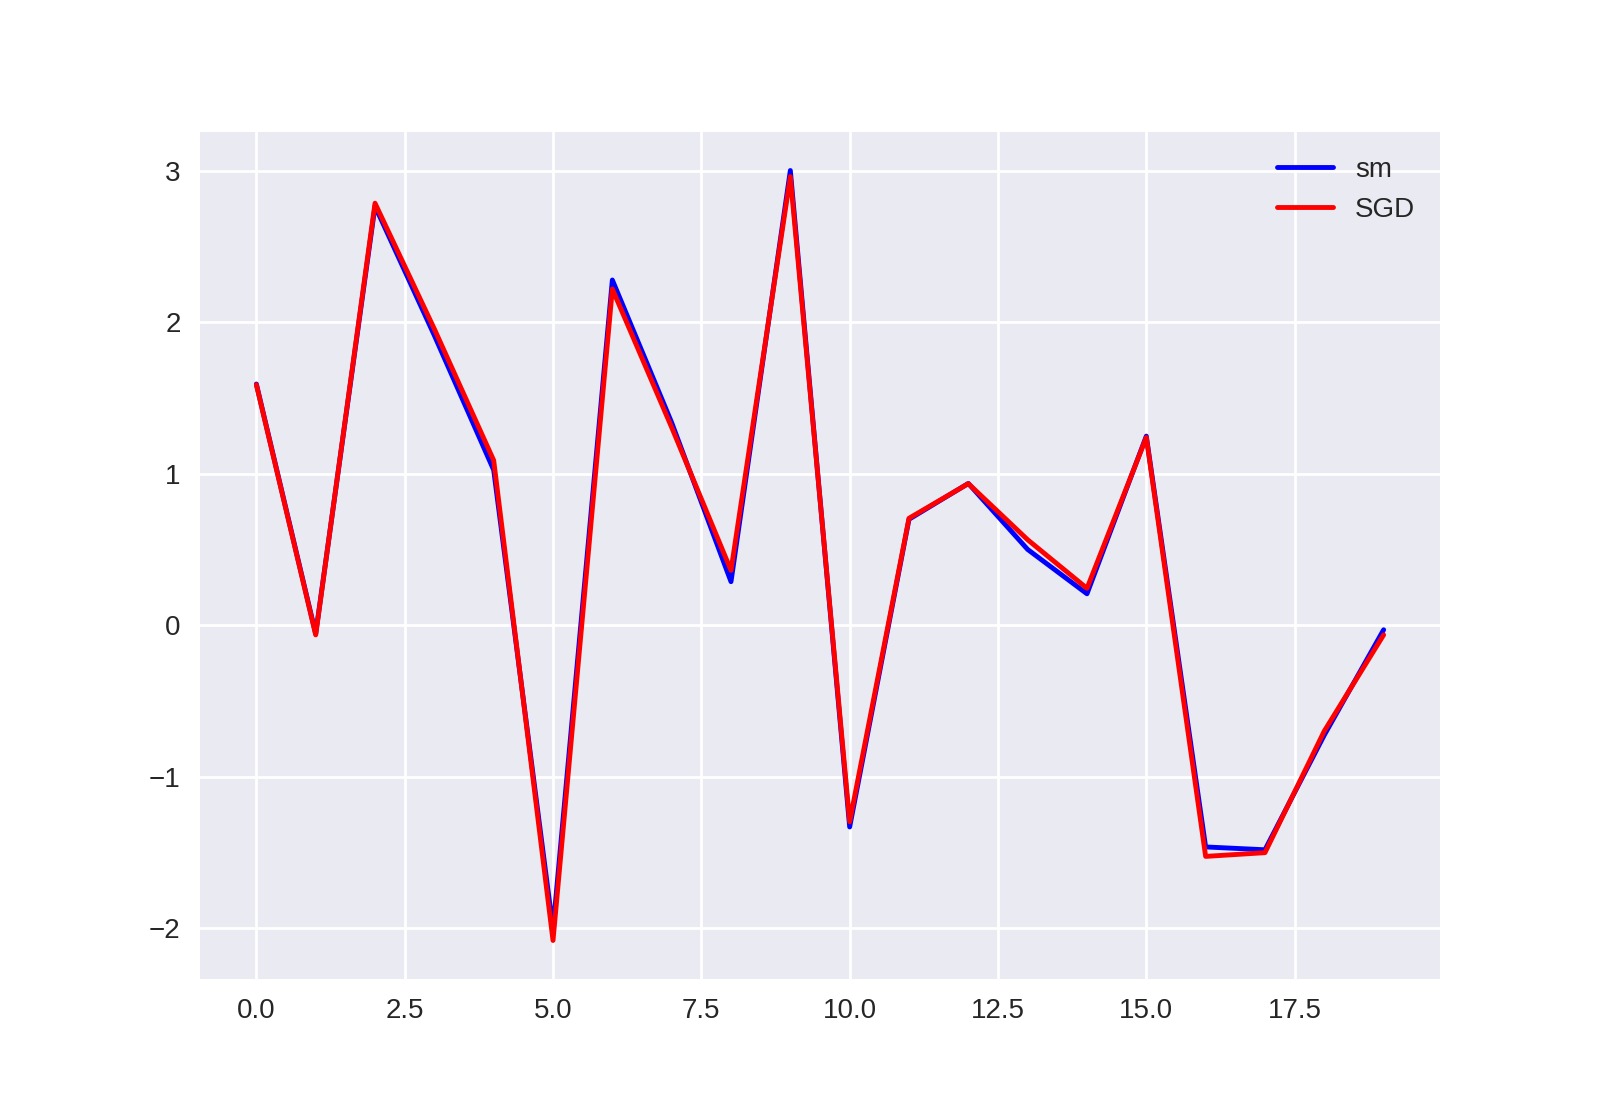

In [18]:
plt.figure()

plt.plot(sm_lr_fit.params, 'b', label="sm")
plt.plot(np.mean(w_sgd, axis=0), 'r', label='SGD')

plt.legend()